In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import scipy.sparse
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

from scipy.optimize import curve_fit

# generate panels c, e and f

panel c

Text(0.5, 0, '$\\Delta t$')

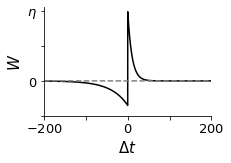

In [5]:
ticksFontsize = 13
labelFontsize = 15


t = np.arange(-200,200,0.1) # ms
STDP_func = STDP( t )

fig = plt.figure( figsize = (3,2))

ax = fig.add_subplot( 111 )
ax.plot( t , STDP_func , color = 'black')

ax.plot( t , np.zeros( t.shape ) , color = 'gray', ls='--')

ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([-200,-100,0,100,200])
ax.set_yticks([-0.5,0,0.5,1])

ax.set_xticklabels(['$-200$','','$0$','','$200$'], fontsize = ticksFontsize )
ax.set_yticklabels(['','$0$','','$\eta$'], fontsize = ticksFontsize)

ax.set_xlim(-200,200)
ax.set_xlim(-200,200)

ax.set_ylabel('$W$', fontsize = labelFontsize)
ax.set_xlabel('$\Delta t$', fontsize = labelFontsize)

# plt.savefig('STDP.svg', bbox_inches='tight')
# plt.savefig('STDP.png', bbox_inches='tight', dpi=300)
# plt.savefig('STDP.pdf', bbox_inches='tight')

panel e

get data

In [9]:
Dalpha_array = np.linspace( 0,1,200 )
f_array = np.linspace( 0,50,200 )

tau = 3.0 # ms

Dalpha_2d = np.zeros(  (len(Dalpha_array),len(f_array))  )
f_array_2d = np.zeros(  (len(Dalpha_array),len(f_array))  )
OneSynapse_2d = np.zeros(  (len(Dalpha_array),len(f_array))  )
wMinus_OneSynapse_2d = np.zeros(  (len(Dalpha_array),len(f_array))  )
wPlus_OneSynapse_2d = np.zeros(  (len(Dalpha_array),len(f_array))  )

wBoth_2D = np.zeros(  (len(Dalpha_array),len(f_array))  )

for kDalpha in range( len(Dalpha_array) ):
    Dalpha = Dalpha_array[ kDalpha ]
    
    for kf in range( len(f_array) ):     
        f = f_array[ kf ]
        
        Dalpha_2d[  kDalpha , kf ] = Dalpha
        f_array_2d[ kDalpha , kf ] = f
        total, minus, plus  = OneSynapse( Dalpha , f , tau )
        OneSynapse_2d[ kDalpha , kf ] = total
        wMinus_OneSynapse_2d[ kDalpha , kf ] = minus
        wPlus_OneSynapse_2d[ kDalpha , kf ] = plus
        total_ref, minus_ref, plus_ref  = OneSynapse( 1-Dalpha , f , tau )
        wBoth_2D[ kDalpha , kf ] = total + total_ref


/Users/jkromer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/Users/jkromer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(0.0, 30.0)

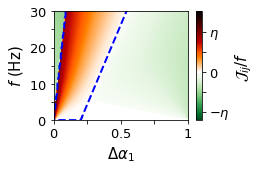

In [10]:
# define color map
JMin = -1.2
JMax = 1.5

nPointsNeg = int(256*np.abs(JMin)/(JMax-JMin))
colors1 = plt.cm.Greens_r(np.linspace(0., 1, nPointsNeg))
colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 256-nPointsNeg))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plt.figure(figsize=(3,2))

cax = plt.contourf( Dalpha_2d , f_array_2d , OneSynapse_2d , levels = np.arange(JMin,JMax+0.01,0.01), cmap=mymap , vmin=JMin, vmax=JMax )
#plt.contour( Dalpha_2d , f_array_2d , OneSynapse_2d , levels = [0], colors='white' , vmin=JMin, vmax=JMax, linewidths=7 )
plt.contour( Dalpha_2d , f_array_2d , OneSynapse_2d , levels = [0], colors='blue' , vmin=JMin, vmax=JMax, linewidths=2, linestyles='--' )
cbar = plt.colorbar( cax, ticks=[-1,-0.5,0,0.5,1] )
cbar.ax.set_yticklabels( ['$-\eta$','',  '$0$', '','$\eta$'] , fontsize= ticksFontsize )
cbar.set_label( '$\\mathcal{J}_{ij}/f$' , fontsize=labelFontsize)

plt.xticks( [0,0.25,0.5,0.75,1], ['$0$','','$0.5$','','$1$'], fontsize = ticksFontsize )
plt.yticks( [0,5,10,15,20,25,30], ['$0$','','$10$','','$20$','','$30$'], fontsize = ticksFontsize )

plt.xlabel('$\\Delta \\alpha_{1}$', fontsize=labelFontsize)
plt.ylabel('$f$ (Hz)', fontsize=labelFontsize)
plt.xlim(0,1)
plt.ylim(0,30)

# plt.savefig('J_single_synapse.svg', bbox_inches='tight')
# plt.savefig('J_single_synapse.png', bbox_inches='tight', dpi=300)
# plt.savefig('J_single_synapse.pdf', bbox_inches='tight')

panel f

(0.0, 30.0)

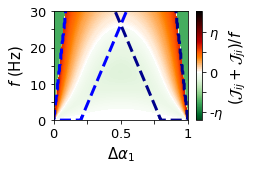

In [11]:
# define color map
JMin = -1.2
JMax = 1.5

nPointsNeg = int(256*np.abs(JMin)/(JMax-JMin))
colors1 = plt.cm.Greens_r(np.linspace(0., 1, nPointsNeg))
colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 256-nPointsNeg))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plt.figure(figsize=(3,2))

cax = plt.contourf( Dalpha_2d , f_array_2d , wBoth_2D , levels = np.arange(JMin,JMax+0.01,0.01), cmap=mymap , vmin=JMin, vmax=JMax )
plt.contour( Dalpha_2d , f_array_2d , OneSynapse_2d , levels = [0], colors='blue' , vmin=JMin, vmax=JMax, linewidths=3, linestyles='--' )
plt.contour( 1-Dalpha_2d , f_array_2d , OneSynapse_2d , levels = [0], colors='darkblue' , vmin=JMin, vmax=JMax, linewidths=3, linestyles='--' )


#plt.contour( Dalpha_2d , f_array_2d , OneSynapse_2d , levels = [0], colors='white' , vmin=JMin, vmax=JMax, linewidths=7 )
#plt.contour( Dalpha_2d , f_array_2d , wBoth_2D , levels = [0], colors='0.8' , vmin=JMin, vmax=JMax, linewidths=3, linestyles='--' )
cbar = plt.colorbar( cax, ticks=[-1,-0.5,0,0.5,1] )
cbar.ax.set_yticklabels( ['-$\eta$','',  '$0$', '','$\eta$'] , fontsize= ticksFontsize )
# cbar.ax.set_yticklabels( ['-$\eta$','',  '$0$', '','$\eta$'] , fontsize= ticksFontsize )
cbar.set_label( '$(\\mathcal{J}_{ij}+\\mathcal{J}_{ji})/f$' , fontsize=labelFontsize)

plt.xticks( [0,0.25,0.5,0.75,1], ['$0$','','$0.5$','','$1$'], fontsize = ticksFontsize )
plt.yticks( [0,5,10,15,20,25,30], ['$0$','','$10$','','$20$','','$30$'], fontsize = ticksFontsize )

plt.xlabel('$\\Delta \\alpha_{1}$', fontsize=labelFontsize)
plt.ylabel('$f$ (Hz)', fontsize=labelFontsize)
plt.xlim(0,1)
plt.ylim(0,30)

# plt.savefig('J_bidirection_synapse.svg', bbox_inches='tight')
# plt.savefig('J_bidirection_synapse.png', bbox_inches='tight', dpi=300)
# plt.savefig('J_bidirection_synapse.pdf', bbox_inches='tight')

# functions

In [8]:
# t ... time in ms
def STDP( t ):
    
    tplus = 10.0 # ms
    tR = 4.0
    beta = 1.4
    
    W = np.zeros( t.shape )
    
    W[t<0] = -beta/tR * np.exp( t[t<0]/(tR*tplus) )
    W[t>0] = np.exp( -t[t>0]/(tplus) )
    
    return W

def OneSynapse( Dalpha , f_Hz , tau ):
    
    T_cycle = 1000.0/f_Hz # ms
    return STDP( -( tau + (1-Dalpha)*T_cycle ) ) + STDP( Dalpha*T_cycle - tau ), STDP( -( tau + (1-Dalpha)*T_cycle ) ) , STDP( Dalpha*T_cycle - tau )
